# LFT — Kochen–Specker Logic Graph Visualization
This notebook visualizes the logical relationships in a simplified Kochen–Specker setup under Logic Field Theory (LFT).

- **Nodes** represent propositions (observable assignments and constraints)
- **Edges** indicate logical implication or mutual exclusion
- Contradictions are highlighted in **red**
- If contradiction is detected, the graph is flagged as logically incoherent

In [1]:
!pip install sympy networkx matplotlib --quiet

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from sympy import symbols, And, Not, Or, satisfiable

# Observable propositions
X11, X12, X13 = symbols("X11 X12 X13")
X21, X22, X23 = symbols("X21 X22 X23")
X31, X32, X33 = symbols("X31 X32 X33")

# Contradictory assignment
assignment = [X11, X12, X21, X22, X31]

# Constraints
constraints = [
    Or(X11, X12, X13), Or(X21, X22, X23), Or(X31, X32, X33),
    Not(And(X11, X12)), Not(And(X11, X13)), Not(And(X12, X13)),
    Not(And(X21, X22)), Not(And(X21, X23)), Not(And(X22, X23)),
    Not(And(X31, X32)), Not(And(X31, X33)), Not(And(X32, X33))
]

In [3]:
# Logic Coherence Check
def logical_coherence_check(assignments, constraints):
    full = And(*(assignments + constraints))
    return bool(satisfiable(full))

is_coherent = logical_coherence_check(assignment, constraints)
print("Logical Coherence:", is_coherent)

Logical Coherence: False


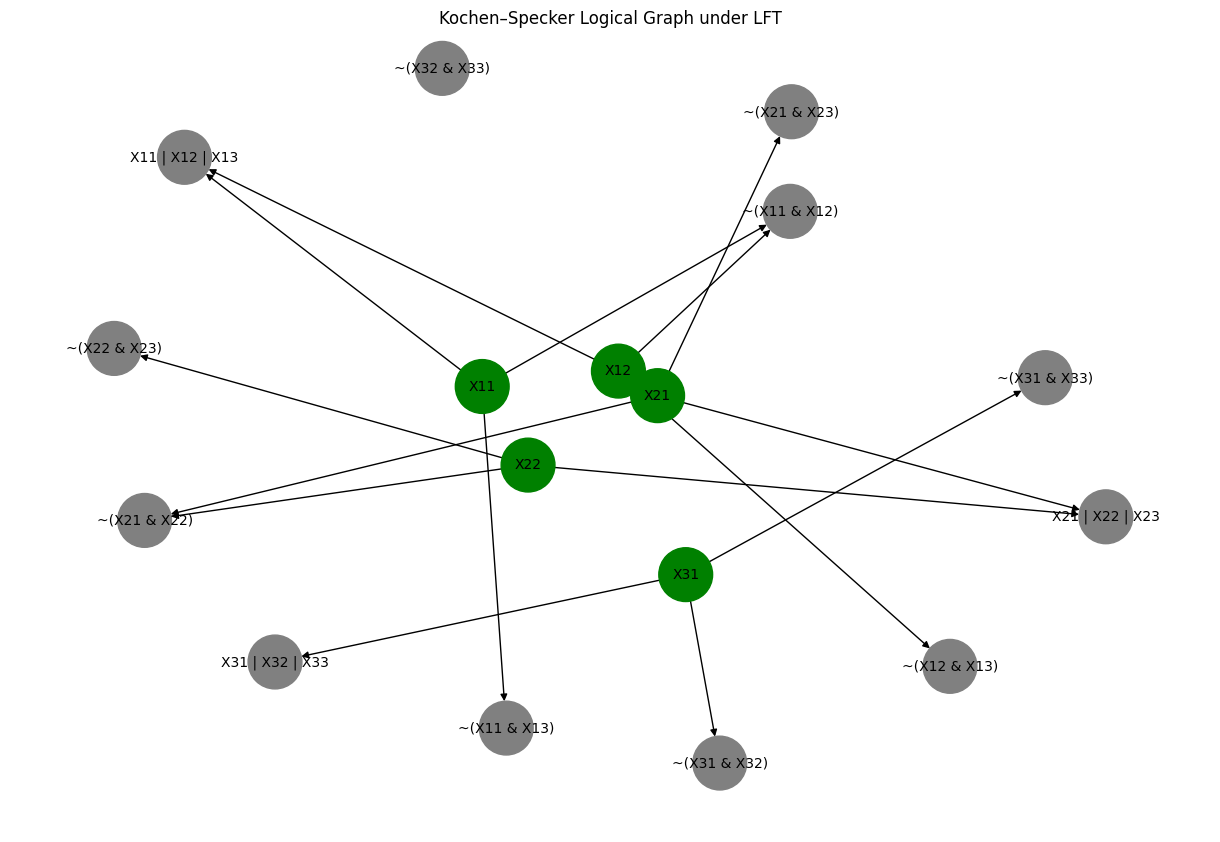

In [5]:
# Visualize logic graph
G = nx.DiGraph()

# Add assignment nodes
for a in assignment:
    G.add_node(str(a), color='green')

# Add constraint nodes and edges
for c in constraints:
    cname = str(c)
    color = 'red' if any(str(a) in cname for a in assignment[:2]) and 'And' in cname else 'gray'
    G.add_node(cname, color=color)
    for a in assignment:
        if str(a) in cname:
            G.add_edge(str(a), cname, color='red' if color == 'red' else 'black')

# Draw
pos = nx.spring_layout(G, seed=42)
colors = [G.nodes[n]['color'] for n in G.nodes]
edges = G.edges()
edge_colors = [G[u][v]['color'] for u,v in edges]

plt.figure(figsize=(12,8))
nx.draw(G, pos, with_labels=True, node_color=colors, edge_color=edge_colors, node_size=1500, font_size=10)
plt.title("Kochen–Specker Logical Graph under LFT")
plt.show()